# Homestays Data Analysis and Price Prediction

This project is aimed at doing a comprehensive analysis of homestays and then predicting their price.



**Data Source**

We make use of the provided Homestays_Data.csv for the same. We will import this dataset using the read_csv() function in pandas library of python.

In [4]:
import pandas as pd

df = pd.read_csv('Homestays_Data.csv', low_memory = False)
df

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,4.605170,Apartment,Private room,{},1,1.0,Real Bed,flexible,False,...,40.709025,-73.939405,one room bushwick,Williamsburg,0,NaN,https://a0.muscache.com/im/pictures/55162426/6...,11206,1.0,1.0
74107,13281809,5.043425,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2.0,Real Bed,moderate,True,...,33.871549,-118.396053,Spacious Hermosa 2 BR on PCH,Hermosa Beach,16,93.0,https://a0.muscache.com/im/pictures/2b86560b-a...,90254,2.0,4.0
74108,18688039,5.220356,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,1.0,Real Bed,moderate,True,...,40.706749,-73.942377,Modern 2 Bedroom Apartment in Williamsburg,Williamsburg,43,94.0,https://a0.muscache.com/im/pictures/7fbe448c-5...,11206,2.0,2.0
74109,17045948,5.273000,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,strict,True,...,40.738535,-74.000157,Designer's Apartment in HEART of NYC,West Village,0,NaN,https://a0.muscache.com/im/pictures/b3971b63-0...,10011,0.0,2.0


# Data Cleaning and Preprocessing

As seen above, the dataset has 74111 rows of data and 29 columns. Let us look at the datatypes of these columns.

In [5]:
df.dtypes

id                          int64
log_price                 float64
property_type              object
room_type                  object
amenities                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
description                object
first_review               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
review_scores_rating      float64
thumbnail_url              object
zipcode                    object
bedrooms                  float64
beds                      float64
dtype: object

**DataType Conversions**

On cross-checking the above columns and their corresponding datatypes with the actual dataset in Excel, we see that they seem accurate for the most part. However, we see that the following three date fields are being read as 'object' datatype:
- first_review
- host_since
- last_review

These need to be converted to datetime data type for accurate analysis.

In [6]:
#Convert 'first_review' column to datetime format
df['first_review'] = pd.to_datetime(df['first_review'], dayfirst= True)

#Convert 'host_since' column to datetime format
df['host_since'] = pd.to_datetime(df['host_since'], dayfirst= True)

#Convert 'last_review' column to datetime format
df['last_review'] = pd.to_datetime(df['last_review'], dayfirst= True)



In [7]:
df.dtypes

id                                 int64
log_price                        float64
property_type                     object
room_type                         object
amenities                         object
accommodates                       int64
bathrooms                        float64
bed_type                          object
cancellation_policy               object
cleaning_fee                        bool
city                              object
description                       object
first_review              datetime64[ns]
host_has_profile_pic              object
host_identity_verified            object
host_response_rate                object
host_since                datetime64[ns]
instant_bookable                  object
last_review               datetime64[ns]
latitude                         float64
longitude                        float64
name                              object
neighbourhood                     object
number_of_reviews                  int64
review_scores_ra

**Dealing with Missing Values**

Let us first have a look at how many missing rows we have in the dataset and then decide how to deal with them.

In [8]:
#Check number of missing values

missing_values = df.isnull().sum()
print(missing_values)

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64


Based on the above number of missing values per column, we can classify the fields under how we deal with them. We will drop all rows with null values for certain columns whereas we will impute the rows with null values using mean, median, mode, etc. for other columns.

Columns where we will impute missing values with **mean value**:

- bathrooms
- host_response_rate
- review_scores_rating
- bedrooms
- beds

For all the above columns, it will be useful to have average number of the column instead of the missing value.

Columns where we will impute missing values with **mode**:
- host_has_profile_pic
- host_identity verified

Since these are more categorical values, it would be useful to replace missing values with mode.

Lastly, columns where we will **drop** rows with missing values:
- first_review
- host_since
- last_review
- neighborhood
- zip code

All the above are factual data and can't necessarily be estimated or quantified. Moreover, they might have consequences on other columns in the dataset. For example, first_review is a data value. If we are imputing this column's missing values with a mode valeu of the column, we need to ensure this date is also smaller than the last_review column, else it would be a wrong data point.

Lastly, we will completely drop the thumbnail_url column since it does not serve any purpose for our data analysis or prediction.

In [9]:
#Drop the 'thumbnail_url' column
df.drop('thumbnail_url', axis=1, inplace=True)

In [10]:
#Remove "%" symbol for host_response_rate and convert to float
df['host_response_rate'] = df['host_response_rate'].str.rstrip('%').astype(float)

In [11]:
#Columns where missing values will be imputed with mean
mean_impute_columns = ['bathrooms', 'host_response_rate', 'review_scores_rating', 'bedrooms', 'beds']

for col in mean_impute_columns:
    df[col].fillna(df[col].mean(), inplace=True)

#Columns where missing values will be imputed with mode
mode_impute_columns = ['host_has_profile_pic', 'host_identity_verified']

for col in mode_impute_columns:
    mode_val = df[col].mode()[0]  # Calculate mode
    df[col].fillna(mode_val, inplace=True)

#Columns where rows with missing values will be dropped
drop_columns = ['first_review', 'host_since', 'last_review', 'neighbourhood', 'zipcode']

df.dropna(subset=drop_columns, inplace=True)


In [12]:
#Check number of missing values again

missing_values = df.isnull().sum()
print(missing_values)

id                        0
log_price                 0
property_type             0
room_type                 0
amenities                 0
accommodates              0
bathrooms                 0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
city                      0
description               0
first_review              0
host_has_profile_pic      0
host_identity_verified    0
host_response_rate        0
host_since                0
instant_bookable          0
last_review               0
latitude                  0
longitude                 0
name                      0
neighbourhood             0
number_of_reviews         0
review_scores_rating      0
zipcode                   0
bedrooms                  0
beds                      0
dtype: int64


We have successfully dealt with all missing values! Let's see what our dataset now looks like.

In [13]:
df

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,10027,1.0,3.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,20009,0.0,1.0
5,12422935,4.442651,Apartment,Private room,"{TV,""Wireless Internet"",Heating,""Smoke detecto...",2,1.0,Real Bed,strict,True,...,2017-09-05,37.753164,-122.429526,Comfort Suite San Francisco,Noe Valley,3,100.0,94131,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74102,7935934,4.110874,Villa,Shared room,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",10,3.0,Real Bed,flexible,False,...,2017-01-01,34.199671,-118.618070,UR SWEET HOME IN LA,West Hills,1,80.0,91307,1.0,10.0
74103,11829011,5.135798,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,1.0,Real Bed,moderate,True,...,2015-11-13,37.789989,-122.407384,WorldMark W'ndm Union Square Studio,Union Square,24,98.0,94108,1.0,1.0
74107,13281809,5.043425,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2.0,Real Bed,moderate,True,...,2017-04-15,33.871549,-118.396053,Spacious Hermosa 2 BR on PCH,Hermosa Beach,16,93.0,90254,2.0,4.0
74108,18688039,5.220356,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,1.0,Real Bed,moderate,True,...,2017-09-10,40.706749,-73.942377,Modern 2 Bedroom Apartment in Williamsburg,Williamsburg,43,94.0,11206,2.0,2.0


Our dataset is now ready to use for analysis. Our final dataset consists of 52576 rows and 28 columns. Let us copy this dataframe and work on the copy going forward in order to have a backup in case we make any irreversible changes.


In [14]:
#Create a copy of df

df2 = df

# Feature Engineering

For this task, we are going to calculate `Host_Tenure` by determining the number of years from `host_since` to the current date, thereby providing a measure of host experience. We will also generate `Amenities_Count` by counting the items listed in the `amenities` array to quantify property offerings. Lastly, we will determine `Days_Since_Last_Review` by calculating the days between `last_review` and today to assess listing activity and relevance.

In [15]:
from datetime import datetime

#Calculate host tenure in years
current_date = datetime.now()
df2['host_tenure'] = (current_date - df2['host_since']).dt.days / 365


In [16]:
#Round the 'Host_Tenure' column to integer
df2['host_tenure'] = df2['host_tenure'].round().astype(int)

In [17]:
#Convert ammenities to a list
df2['amenities'] = df2['amenities'].apply(lambda x: x.strip('{}').split(','))

# Count the number of amenities
df2['Amenities_Count'] = df2['amenities'].apply(len)

In [18]:
#Calculate days since last review
df2['Days_Since_Last_Review'] = (current_date - df2['last_review']).dt.days

In [19]:
df2

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,host_tenure,Amenities_Count,Days_Since_Last_Review
0,6901257,5.010635,Apartment,Entire home/apt,"[""Wireless Internet"", ""Air conditioning"", Kitc...",3,1.0,Real Bed,strict,True,...,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,11201,1.0,1.0,12,9,2850
1,6304928,5.129899,Apartment,Entire home/apt,"[""Wireless Internet"", ""Air conditioning"", Kitc...",7,1.0,Real Bed,strict,True,...,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,10019,3.0,3.0,7,15,2418
2,7919400,4.976734,Apartment,Entire home/apt,"[TV, ""Cable TV"", ""Wireless Internet"", ""Air con...",5,1.0,Real Bed,moderate,True,...,The Garden Oasis,Harlem,10,92.0,10027,1.0,3.0,8,19,2427
4,3808709,4.744932,Apartment,Entire home/apt,"[TV, Internet, ""Wireless Internet"", ""Air condi...",2,1.0,Real Bed,moderate,True,...,Great studio in midtown DC,Columbia Heights,4,40.0,20009,0.0,1.0,9,12,2662
5,12422935,4.442651,Apartment,Private room,"[TV, ""Wireless Internet"", Heating, ""Smoke dete...",2,1.0,Real Bed,strict,True,...,Comfort Suite San Francisco,Noe Valley,3,100.0,94131,1.0,1.0,7,10,2436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74102,7935934,4.110874,Villa,Shared room,"[TV, ""Wireless Internet"", ""Air conditioning"", ...",10,3.0,Real Bed,flexible,False,...,UR SWEET HOME IN LA,West Hills,1,80.0,91307,1.0,10.0,11,22,2683
74103,11829011,5.135798,Apartment,Entire home/apt,"[TV, ""Cable TV"", Internet, ""Wireless Internet""...",2,1.0,Real Bed,moderate,True,...,WorldMark W'ndm Union Square Studio,Union Square,24,98.0,94108,1.0,1.0,13,24,3098
74107,13281809,5.043425,Apartment,Entire home/apt,"[TV, ""Cable TV"", Internet, ""Wireless Internet""...",4,2.0,Real Bed,moderate,True,...,Spacious Hermosa 2 BR on PCH,Hermosa Beach,16,93.0,90254,2.0,4.0,8,16,2579
74108,18688039,5.220356,Apartment,Entire home/apt,"[TV, Internet, ""Wireless Internet"", ""Air condi...",5,1.0,Real Bed,moderate,True,...,Modern 2 Bedroom Apartment in Williamsburg,Williamsburg,43,94.0,11206,2.0,2.0,12,31,2431


As we can see above, the dataframe now has 3 new columns that enhance the dataset with actionable and insightful features.

# Exploratory Data Analysis

Firstly, let's analyse how 'log_price' correlates with **categorical variables** such as room_type and property_type. In order to do this, I have made the use of group summary statistics as shown below.

In [20]:
#Grouped summary statistics of log_price with room_type
room_type_summary = df2.groupby('room_type')['log_price'].describe()
room_type_summary.drop(columns = ['std','25%','50%','75%'], axis = 1, inplace = True)
pd.DataFrame(room_type_summary)

,count,mean,min,max
room_type,,,,
Entire home/apt,30446.0,5.122609,1.609438,7.600402
Private room,20919.0,4.302624,2.302585,7.313220
Shared room,1211.0,3.828561,0.000000,7.170120


What this dataframe means is that there are three types of room types, namely - Entire home/apt, private room and shared room. Let's consider the Entire room/apt row as an example. This row means that there are 30446 rows (home stays) with this room type, the average log_price of these homestays is 5.122, minimum log_price among homestays with this room type is 1.609 and max log_price is 7.60.

In [21]:
print("Room type of homestays with highest average log_price: ",room_type_summary['mean'].idxmax())

Room type of homestays with highest average log_price:  Entire home/apt


In [22]:
print("Room type of homestays with highest average log_price: ",room_type_summary['mean'].idxmin())

Room type of homestays with highest average log_price:  Shared room


The above two lines of code convey that homestays with Entire home/apt room type have the highest log price generally and those with shared room room_type have the lowest.

In [23]:
#Grouped summary statistics of log_price with property_type
property_type_summary = df2.groupby('property_type')['log_price'].describe()
property_type_summary.drop(columns = ['std','25%','50%','75%'], axis = 1, inplace = True)
pd.DataFrame(property_type_summary)

,count,mean,min,max
property_type,,,,
Apartment,35568.0,4.747412,1.609438,7.600402
Bed & Breakfast,321.0,4.538671,2.995732,6.907755
Boat,38.0,5.148461,4.174387,7.130899
Boutique hotel,47.0,4.828464,4.077537,6.109248
Bungalow,263.0,4.779666,3.555348,6.767343
Cabin,49.0,4.603097,3.663562,5.521461
Camper/RV,39.0,4.382413,2.833213,5.857933
Castle,12.0,5.368239,4.553877,6.599870
Cave,2.0,4.909373,4.828314,4.990433


In [24]:
print("Property type of homestays with highest average log_price: ",property_type_summary['mean'].idxmax())

Property type of homestays with highest average log_price:  Timeshare


In [25]:
print("Property type of homestays with highest average log_price: ",property_type_summary['mean'].idxmin())

Property type of homestays with highest average log_price:  Hostel


Similar analysis has been carried out for property type of homestays above. Timeshare homestays generally have been found to have the highest log price and Hostel homestays seem to have the lowest.

Let us now move forward with the correlation analysis for log_price with numeric columns such as 'accomodates' and 'number_of_reviews'.

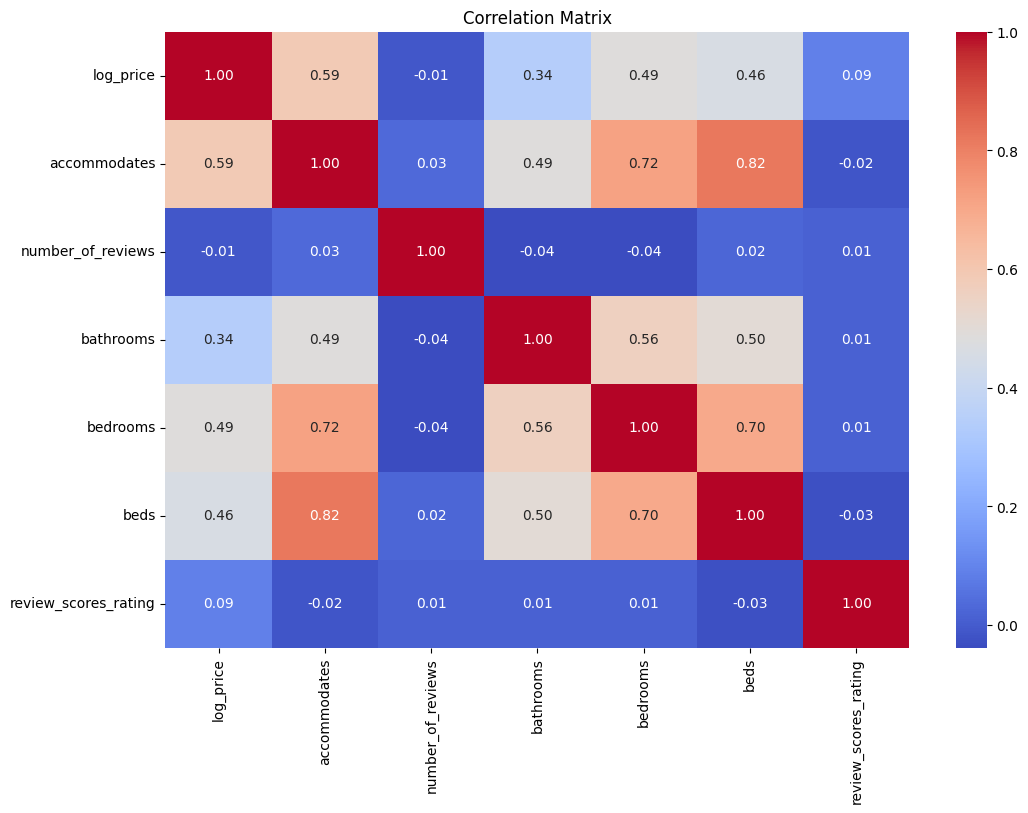

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = ['log_price', 'accommodates', 'number_of_reviews','bathrooms', 'bedrooms', 'beds', 'review_scores_rating']

correlation_matrix = df2[numerical_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


From the above correlation matrix, we can make the following deductions:
- log_price has the highest positive correlation with the number of peoplpe it accomodates. This means that the more people a homestay can accomodate, the higher is the log price generally.
- The number of bedrooms are the next highest factor that determine the log price. Followed by the number of beds and bathrooms respectively.
- Lastly, the review scores rating has the least positive correlation with the log price, which means it contributes the least to a higher log_price.
- The number of reviews on a property seem to have a slight negative correlation with the property. However, this is a negligible value and might be considered to have no impact on the log price of the homestay.

Let us now move on to the distribution analysus where we'll plot histograms to visualize the distributions of numerical features and understand their spread and central tendency.

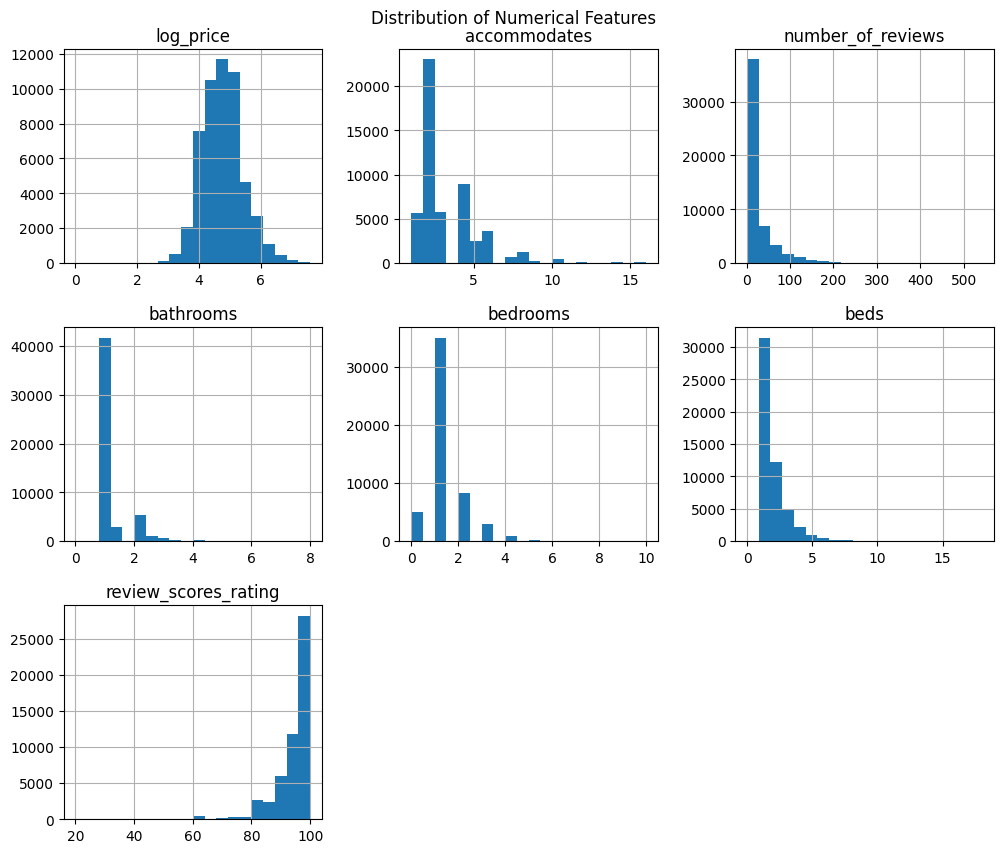

In [27]:
#Distribution Analysis
df2[numerical_columns].hist(bins=20, figsize=(12, 10))
plt.suptitle('Distribution of Numerical Features', y=0.92)
plt.show()

From the above plots, we can clearly see that log_price has a bell-shaped curve with uniform distribution. The others have mostly skewed distributions with:
- Most homestays have 0 to 5 rooms
- Most homestays have 0 - 100 reviews
- Most homestays have 1- 2 bathrooms
- Most homestays have 0 - 2 bedrooms
- Most homestays have 0 - 5 beds
- Most homestays have review scores rating between 80% - 100%

Let us now move on to the relationship analysis where we'll use scatter plots to explore the relationships between log_price and other numerical features, as well as box plots to analyze how categorical variables like room_type and property_type affect the distribution of log_price.

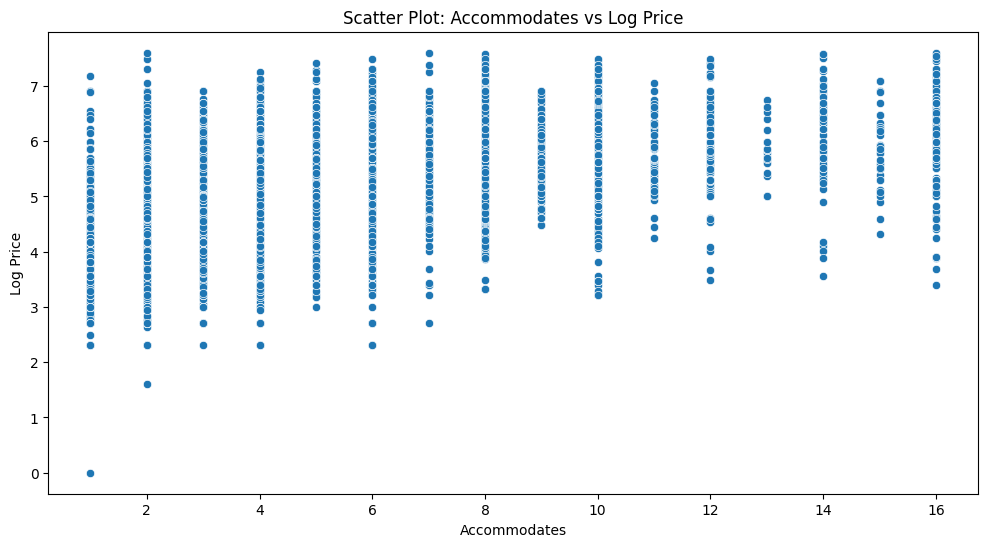

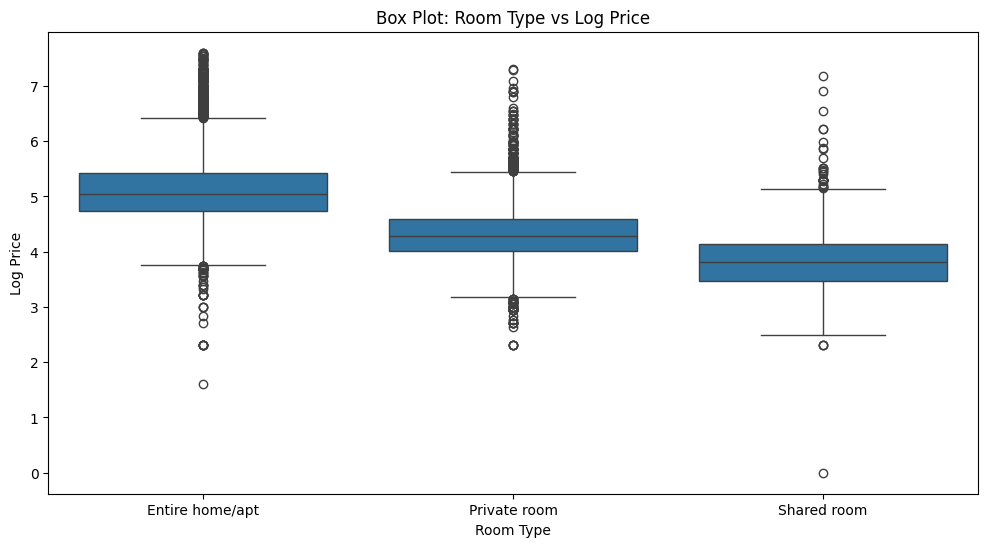

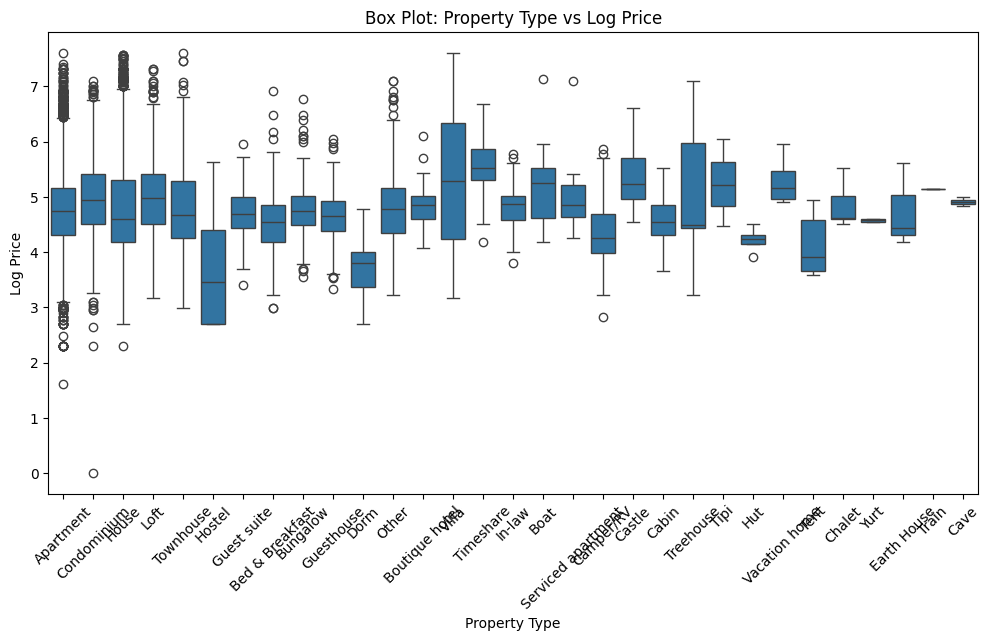

In [28]:
#Relationship Analysis
plt.figure(figsize=(12, 6))
sns.scatterplot(x='accommodates', y='log_price', data=df2)
plt.title('Scatter Plot: Accommodates vs Log Price')
plt.xlabel('Accommodates')
plt.ylabel('Log Price')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='room_type', y='log_price', data=df2)
plt.title('Box Plot: Room Type vs Log Price')
plt.xlabel('Room Type')
plt.ylabel('Log Price')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='property_type', y='log_price', data=df2)
plt.title('Box Plot: Property Type vs Log Price')
plt.xlabel('Property Type')
plt.ylabel('Log Price')
plt.xticks(rotation=45)
plt.show()


# Geospatial Analysis


In this section, we shall plot the homestay listings on a map using the
`latitude` and `longitude` data to visually assess price distribution.

For this we will use the folium library. I initially tried plotting all data points, but it seemed like the load was too high and the runtime kept disconnecting. I am therefore going to sample the dataset and use the first 1000 values and plot them and examine them. I am also going to put them in batches of 100 for more efficient processing.

In [29]:
import folium

#Sample a subset of 1000 rows of the data for visualization
sample_data = df2.head(1000)

#Create a map centered around the mean latitude and longitude
map_center = [sample_data['latitude'].mean(), sample_data['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=10)

#Add markers for each listing in batches
batch_size = 100
for i in range(0, len(sample_data), batch_size):
    batch = sample_data.iloc[i:i+batch_size]
    for _, row in batch.iterrows():
        popup_content = f"Name: {row['name']}<br>Log Price: {row['log_price']:.2f}"
        folium.Marker([row['latitude'], row['longitude']], popup=popup_content).add_to(m)
m

From the above map, we can see that the homestays in the centre of newyork city have a much higher log price between 6 - 7 whereas the ones in the outskirts or away from the city centre have a log price between 3.5 - 4.5.


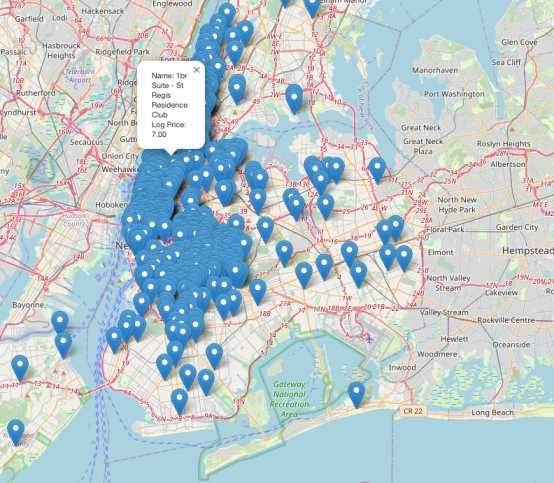


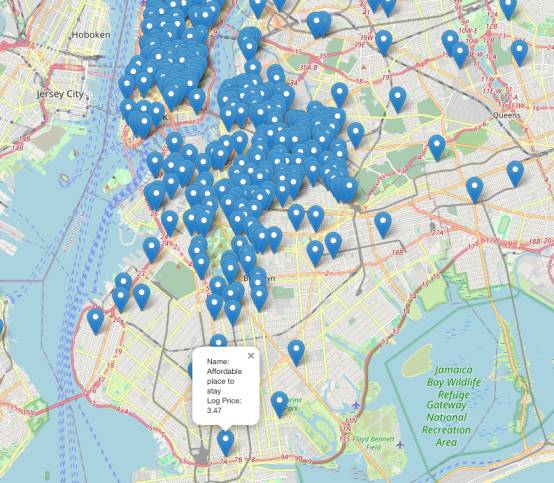

# 4. Sentiment Analysis on Textual Data

This section will mainly deal with quantifying the text data under the 'description' column. For this, we will make use of the textblob library in python and use the polarity property to generate a sentiment score between [-1,1].

A score of -1 will denote extreme negative review and 1 will denote extreme positive review. We will then use these sentiment scores as a new column in the dataframe and check it's correlation with log price to see if it impacts it.

In [30]:
from textblob import TextBlob

#Function to compute sentiment scores
def get_sentiment_score(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

#Apply sentiment analysis to the 'description' column
df2['description_sentiment'] = df2['description'].apply(get_sentiment_score)

print(df2[['description', 'description_sentiment']].head(100))

                                           description  description_sentiment
0    Beautiful, sunlit brownstone 1-bedroom in the ...               0.716667
1    Enjoy travelling during your stay in Manhattan...               0.250000
2    The Oasis comes complete with a full backyard ...               0.274085
4    Cool, cozy, and comfortable studio located in ...               0.196795
5    Beautiful private room overlooking scenic view...               0.292143
..                                                 ...                    ...
144  My home is a classic Spanish style treasure on...               0.220679
145  1 bdrm avail in 2 bdrm apt. Bedroom with the h...               0.295227
146  Private bedroom with private bathroom off peac...               0.165297
149  Triple mint modern loft. Key locked elevator, ...               0.143750
150  1br in 2bhk available just 20 minutes walk fro...               0.387143

[100 rows x 2 columns]


From the above sentiment scores, we can see that most of the reviews are fairly positive in nature. Let us now check the correlation between these sentiment scores and log price to see if they have a positive or negative impact on them.

In [31]:
#Calculate correlation between 'log_price' and 'description_sentiment'
correlation = df2['log_price'].corr(df2['description_sentiment'])
print("Correlation between Log Price and Description Sentiment:", correlation)


Correlation between Log Price and Description Sentiment: 0.07433880875909073


In this case,  we see that the description sentiment does **NOT** have a significant impact on the log price, as the correlation coefficient is very close to 0.

# Amenities Analysis


In this section, we will explore whether making certain amenities available in homestays such as Wireless Internet, AC, etc. has an influence on log price. In fact, we will check the impact of each of these amenities on the log price.

But prior to that, we already have a column named Amenities_Count which we created. Let us first see if the number of amenities have a correlation with the log price.

In [32]:
#Calculate correlation between 'log_price' and 'Amenities_Count'
correlation = df2['log_price'].corr(df2['Amenities_Count'])
print("Correlation between Log Price and Amenities_Count:", correlation)

Correlation between Log Price and Amenities_Count: 0.22178394293717563


Yes, we have a significant correlation between the two. The higher the number of amenities in the homestay, the higher the log price to a certain extent.

Let us now see the correlation between each of the amenities with the log price. We will work on a copy of df2 since this portion will involve changing the dataset with new columns, one for each amenity (denoted by 1 for present and 0 for absent).

In [33]:
df3 = df2.copy()

In [34]:
df3['amenities'].dtype

dtype('O')

In [35]:
# Step 1: Convert list values to a format suitable for one-hot encoding
amenities_df = df3['amenities'].apply(lambda x: ', '.join(x)).str.get_dummies(', ')

In [36]:
# Step 2: Perform one-hot encoding using get_dummies()
one_hot_encoded_df = pd.get_dummies(amenities_df, prefix='', prefix_sep='')
one_hot_encoded_df

,"smooth pathway to front door""","""24-hour check-in""","""Accessible-height bed""","""Accessible-height toilet""","""Air conditioning""","""Air purifier""","""BBQ grill""","""Baby bath""","""Baby monitor""","""Babysitter recommendations""",...,Other,Oven,Pool,Refrigerator,Shampoo,Smartlock,Stove,TV,Washer,Waterfront
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74102,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
74103,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
74107,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
74108,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,1,0,1,1,1,0


In [37]:
# Step 3: Concatenate the one-hot encoded DataFrame with the original DataFrame
df3 = pd.concat([df3, one_hot_encoded_df], axis=1)

df3

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,Other,Oven,Pool,Refrigerator,Shampoo,Smartlock,Stove,TV,Washer,Waterfront
0,6901257,5.010635,Apartment,Entire home/apt,"[""Wireless Internet"", ""Air conditioning"", Kitc...",3,1.0,Real Bed,strict,True,...,0,0,0,0,0,0,0,0,0,0
1,6304928,5.129899,Apartment,Entire home/apt,"[""Wireless Internet"", ""Air conditioning"", Kitc...",7,1.0,Real Bed,strict,True,...,0,0,0,0,1,0,0,0,1,0
2,7919400,4.976734,Apartment,Entire home/apt,"[TV, ""Cable TV"", ""Wireless Internet"", ""Air con...",5,1.0,Real Bed,moderate,True,...,0,0,0,0,1,0,0,1,0,0
4,3808709,4.744932,Apartment,Entire home/apt,"[TV, Internet, ""Wireless Internet"", ""Air condi...",2,1.0,Real Bed,moderate,True,...,0,0,0,0,1,0,0,1,0,0
5,12422935,4.442651,Apartment,Private room,"[TV, ""Wireless Internet"", Heating, ""Smoke dete...",2,1.0,Real Bed,strict,True,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74102,7935934,4.110874,Villa,Shared room,"[TV, ""Wireless Internet"", ""Air conditioning"", ...",10,3.0,Real Bed,flexible,False,...,0,0,0,0,1,0,0,1,1,0
74103,11829011,5.135798,Apartment,Entire home/apt,"[TV, ""Cable TV"", Internet, ""Wireless Internet""...",2,1.0,Real Bed,moderate,True,...,0,0,0,0,1,0,0,1,0,0
74107,13281809,5.043425,Apartment,Entire home/apt,"[TV, ""Cable TV"", Internet, ""Wireless Internet""...",4,2.0,Real Bed,moderate,True,...,0,0,0,0,1,0,0,1,1,0
74108,18688039,5.220356,Apartment,Entire home/apt,"[TV, Internet, ""Wireless Internet"", ""Air condi...",5,1.0,Real Bed,moderate,True,...,0,1,0,1,1,0,1,1,1,0


In [38]:
# Drop the original 'amenities' column as it's no longer needed
df3.drop('amenities', axis=1, inplace=True)

In [39]:
#Identify the index of the first column representing amenities
first_amenities_column_index = 32

#Select columns beyond the first 32 columns
amenities_columns = df3.columns[first_amenities_column_index:]

#Calculate correlation matrix between amenities columns and log_price
amenities_correlation_matrix = df3[amenities_columns].corrwith(df3['log_price'])


In [40]:
pd.DataFrame(amenities_correlation_matrix)

,0
"""24-hour check-in""",0.148489
"""Accessible-height bed""",0.004268
"""Accessible-height toilet""",0.000165
"""Air conditioning""",0.040167
"""Air purifier""",-0.005049
...,...
Smartlock,0.022404
Stove,0.049988
TV,0.267495
Washer,0.171172


In [41]:
#Determine the amenity with maximum correlation
max_correlation_amenity = amenities_correlation_matrix.idxmax()

#Determine the amenity with minimum correlation
min_correlation_amenity = amenities_correlation_matrix.idxmin()

#Print the results
print("Amenity which has highest correlation with log price:", max_correlation_amenity, "(", max(amenities_correlation_matrix),")")
print("Amenity which has least correlation with log price:", min_correlation_amenity, "(", min(amenities_correlation_matrix),")")

Amenity which has highest correlation with log price: "Family/kid friendly" ( 0.3125006752192293 )
Amenity which has least correlation with log price: "translation missing: en.hosting_amenity_49" ( -0.23947712743407373 )


From the above results, we see that Family/kid friendly amenities have the **HIGHEST** positive impact on log price of the homestay. As expected, a en.hosting_amenity_49 which is unnamed might be confusing for the customers and hence will have a negative impact on the log price of homestay.

# Categorical Data Encoding

In this penultimate section before building our model, let's deal with all the categorical variables in our dataset. In order to do this, let us first see all the columns which are of 'object' datatype.

In [42]:
#Identify categorical variables
categorical_columns = df3.select_dtypes(include=['object']).columns
categorical_columns

Index(['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city',
       'description', 'host_has_profile_pic', 'host_identity_verified',
       'instant_bookable', 'name', 'neighbourhood', 'zipcode'],
      dtype='object')

In [43]:
num_description = len(df2['description'].unique())
num_name = len(df2['name'].unique())
num_neighbourhood = len(df2['neighbourhood'].unique())
num_zipcode = len(df2['zipcode'].unique())

num_description, num_name, num_neighbourhood, num_zipcode

(52189, 52180, 598, 580)

From the above, we can see 4 columns 'description', 'name', 'neighborhood' and 'zipcode' have high number of unique values and hence very high cardinality. This may cause 'curse of dimensionality' and hence cause overfitting, extremely long training time, high use computational resources, etc. So let us drop these four columns.

In [44]:
#Drop columns with high cardinality
df3 = df3.drop(columns=['name', 'neighbourhood', 'zipcode'], axis=1)

In [45]:
#Drop columns with high cardinality
df3 = df3.drop(columns= ['description'], axis=1)

In [46]:
#Identify new categorical variables
categorical_columns1 = df3.select_dtypes(include=['object']).columns
categorical_columns1

Index(['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city',
       'host_has_profile_pic', 'host_identity_verified', 'instant_bookable'],
      dtype='object')

Let us now perform one-hot encoding on all the new categorical variables.

In [47]:
#Perform one-hot encoding for all categorical variables above
df_encoded = pd.get_dummies(df3, columns=categorical_columns1, drop_first=True)
df_encoded = df_encoded.applymap(lambda x: 1 if x == True else 0 if x == False else x)
df_encoded

,id,log_price,accommodates,bathrooms,cleaning_fee,first_review,host_response_rate,host_since,last_review,latitude,...,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,city_Chicago,city_DC,city_LA,city_NYC,city_SF,host_has_profile_pic_t,host_identity_verified_t,instant_bookable_t
0,6901257,5.010635,3,1.0,1,2016-06-18,94.351967,2012-03-26,2016-07-18,40.696524,...,0,0,0,0,0,1,0,1,1,0
1,6304928,5.129899,7,1.0,1,2017-08-05,100.000000,2017-06-19,2017-09-23,40.766115,...,0,0,0,0,0,1,0,1,0,1
2,7919400,4.976734,5,1.0,1,2017-04-30,100.000000,2016-10-25,2017-09-14,40.808110,...,0,0,0,0,0,1,0,1,1,1
4,3808709,4.744932,2,1.0,1,2015-05-12,100.000000,2015-03-01,2017-01-22,38.925627,...,0,0,0,1,0,0,0,1,1,1
5,12422935,4.442651,2,1.0,1,2017-08-27,100.000000,2017-06-07,2017-09-05,37.753164,...,0,0,0,0,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74102,7935934,4.110874,10,3.0,0,2017-01-01,100.000000,2013-07-01,2017-01-01,34.199671,...,0,0,0,0,1,0,0,1,0,0
74103,11829011,5.135798,2,1.0,1,2011-12-10,100.000000,2011-09-26,2015-11-13,37.789989,...,0,0,0,0,0,0,1,1,0,0
74107,13281809,5.043425,4,2.0,1,2016-08-15,100.000000,2016-05-03,2017-04-15,33.871549,...,0,0,0,0,1,0,0,1,0,0
74108,18688039,5.220356,5,1.0,1,2015-01-03,100.000000,2012-01-05,2017-09-10,40.706749,...,0,0,0,0,0,1,0,1,1,1


In [48]:
#Check that there are no more categorical variables

categorical_columns2 = df_encoded.select_dtypes(include=['object']).columns
categorical_columns2

Index([], dtype='object')

Thus, we have confirmed that all our columns are now numeric or boolean values and our final dataframe df_encoded is now ready for model fitting. Let us go ahead and build the model in the next section.

# Model Development and Training

This section deals with the core part of this project which is the model development and training phase. As part of this, we will conduct three experiments using 3 different machine learning algorithms:
- Model 1 - Linear Regression (baseline model). We are choosing this model because Linear Regression is computationally light and provides a straightforward interpretation of the relationship between the X and y variables in terms of magnitude and direction (via the coefficients of linear regression). Most importantly, since our target variable is a numeric value and not a classification problem, this is a simple yet profound choice as our baseline model.
- Model 2 - Random Forest. It is an ensemble method that is good with both regression and classification problems and generally doesn't require much hyper-parameter tuning. It is also intrumental in reducing/limiting overfitting, thereby making it the perfect choice for our second model.
- Model 3 - Gradient Boosting. Lastly, we experiment with gradient boosting since we have a large number of features and this algorithm is efficient in handling complex interactions and relationships between features. It is also generally less prone to overfitting when compared to Random Forest, thereby making it the perfect choice as our final experiment.

**NOTE: We are not going to normalize our data in this case since we are using Linear Regression, Random Forest and Gradient Boosting which don't necessarily require normalization of input data. Moreover, our input data doesn't have vastly different scales in each column, thereby not making normalization mandatory.**

But before we conduct these experiments, we need to drop all the datetime columns and id column since the former have already been quantified in terms of host_tenure, etc. and the latter is very off-scale and is not necessary for our model.

In [49]:
#Identify the date time columns
datetime_columns = df_encoded.select_dtypes(include=['datetime64']).columns
datetime_columns

Index(['first_review', 'host_since', 'last_review'], dtype='object')

In [50]:
#Drop datetime columns
df4 = df_encoded.drop(columns=datetime_columns)
df4

,id,log_price,accommodates,bathrooms,cleaning_fee,host_response_rate,latitude,longitude,number_of_reviews,review_scores_rating,...,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,city_Chicago,city_DC,city_LA,city_NYC,city_SF,host_has_profile_pic_t,host_identity_verified_t,instant_bookable_t
0,6901257,5.010635,3,1.0,1,94.351967,40.696524,-73.991617,2,100.0,...,0,0,0,0,0,1,0,1,1,0
1,6304928,5.129899,7,1.0,1,100.000000,40.766115,-73.989040,6,93.0,...,0,0,0,0,0,1,0,1,0,1
2,7919400,4.976734,5,1.0,1,100.000000,40.808110,-73.943756,10,92.0,...,0,0,0,0,0,1,0,1,1,1
4,3808709,4.744932,2,1.0,1,100.000000,38.925627,-77.034596,4,40.0,...,0,0,0,1,0,0,0,1,1,1
5,12422935,4.442651,2,1.0,1,100.000000,37.753164,-122.429526,3,100.0,...,0,0,0,0,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74102,7935934,4.110874,10,3.0,0,100.000000,34.199671,-118.618070,1,80.0,...,0,0,0,0,1,0,0,1,0,0
74103,11829011,5.135798,2,1.0,1,100.000000,37.789989,-122.407384,24,98.0,...,0,0,0,0,0,0,1,1,0,0
74107,13281809,5.043425,4,2.0,1,100.000000,33.871549,-118.396053,16,93.0,...,0,0,0,0,1,0,0,1,0,0
74108,18688039,5.220356,5,1.0,1,100.000000,40.706749,-73.942377,43,94.0,...,0,0,0,0,0,1,0,1,1,1


In [51]:
#Drop the ID column
df4 = df4.drop(columns=['id'],axis=1)
df4

,log_price,accommodates,bathrooms,cleaning_fee,host_response_rate,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,...,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,city_Chicago,city_DC,city_LA,city_NYC,city_SF,host_has_profile_pic_t,host_identity_verified_t,instant_bookable_t
0,5.010635,3,1.0,1,94.351967,40.696524,-73.991617,2,100.0,1.0,...,0,0,0,0,0,1,0,1,1,0
1,5.129899,7,1.0,1,100.000000,40.766115,-73.989040,6,93.0,3.0,...,0,0,0,0,0,1,0,1,0,1
2,4.976734,5,1.0,1,100.000000,40.808110,-73.943756,10,92.0,1.0,...,0,0,0,0,0,1,0,1,1,1
4,4.744932,2,1.0,1,100.000000,38.925627,-77.034596,4,40.0,0.0,...,0,0,0,1,0,0,0,1,1,1
5,4.442651,2,1.0,1,100.000000,37.753164,-122.429526,3,100.0,1.0,...,0,0,0,0,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74102,4.110874,10,3.0,0,100.000000,34.199671,-118.618070,1,80.0,1.0,...,0,0,0,0,1,0,0,1,0,0
74103,5.135798,2,1.0,1,100.000000,37.789989,-122.407384,24,98.0,1.0,...,0,0,0,0,0,0,1,1,0,0
74107,5.043425,4,2.0,1,100.000000,33.871549,-118.396053,16,93.0,2.0,...,0,0,0,0,1,0,0,1,0,0
74108,5.220356,5,1.0,1,100.000000,40.706749,-73.942377,43,94.0,2.0,...,0,0,0,0,0,1,0,1,1,1


Let us now prepare our final dataframe df4 for training. First we will separate out all our feature variables under 'X' and the target label as 'y'.

In [52]:
#Separate the target variable (y)
y = df4['log_price']

#Separate the features (X)
X = df4.drop('log_price', axis=1)

X.shape, y.shape

((52576, 192), (52576,))

We will now split the X and y data into train and test sets. We will use **20%** of the data as **test set** and **80%** as **train set**.

We will then fit our first model which is linear regression model.

In [53]:
#Model 1

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

#Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initialize the linear regression model
model_1 = LinearRegression()

#Train the model on the training data
model_1.fit(X_train, y_train)

#Predict log_price for the testing data
y_pred = model_1.predict(X_test)

#Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

#Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 0.15208075074467983
Mean Absolute Error (MAE): 0.29681162413065093


Before interpreting the MSE and MAE, let's get a better sense of what our true and predicted values look like.

In [54]:
pd.DataFrame(y_test)

,log_price
71493,2.833213
42380,4.174387
46475,4.094345
34302,4.976734
49169,4.709530
...,...
46453,5.521461
21520,4.488636
68985,4.248495
58452,5.517453


In [55]:
pd.DataFrame(y_pred)

,0
0,4.178279
1,4.094984
2,4.690633
3,5.372707
4,4.942455
...,...
10511,5.609002
10512,5.132099
10513,4.208191
10514,4.292670


From the above, we see that our true and predicted values look fairly similar. In order to better understand how good our MAE and MSE values are, let us look at the range of values in our log_price target label.

In [56]:
#get the range of log_price values
min(df4['log_price']), max(df4['log_price'])

(0.0, 7.600402335)

From the above range, we can interpret the MSE and MAE as below:
- Mean Squared Error (MSE): 0.152 is a relatively small fraction of the overall range of the log price. This suggests that, on average, the squared difference between the actual and predicted log prices is relatively small compared to the variability in the log prices themselves.
- Mean Absolute Error (MAE): 0.297 indicates that, on average, the absolute difference between the actual and predicted log prices is also relatively small compared to the range of log prices.

Thus, in this context, both MSE and MAE values seem reasonable given the scale of our target label which is log_price.

Let us now move on to the second experiment using Random Forest algorithm. We set the following parameters for this experiment:
- **n_estimators = 100:** This represents the number of trees in the forest and we set it to 100 in order to strike a balance between predictive accuracy and computational efficiency.
- **random_state = 42** This enables reproducibility of our model results.

In [ ]:
#Model 2

from sklearn.ensemble import RandomForestRegressor

#Initialize and train the Random Forest model
model_2 = RandomForestRegressor(n_estimators=100, random_state=42)
model_2.fit(X_train, y_train)

#Make predictions
y_pred_2 = model_2.predict(X_test)

#Calculate evaluation metrics
mse_2 = mean_squared_error(y_test, y_pred_2)
mae_2 = mean_absolute_error(y_test, y_pred_2)

print("Random Forest:")
print("Mean Squared Error (MSE):", mse_2)
print("Mean Absolute Error (MAE):", mae_2)

Random Forest:
Mean Squared Error (MSE): 0.11682552312566398
Mean Absolute Error (MAE): 0.2502582557709433


Let us now move on to the second experiment using Gradient Boosting algorithm. We set the following parameters for this experiment:
- **n_estimators = 100:** We set it to 100 in order to strike a balance between predictive accuracy and computational efficiency, and also to balance the bias-variance trade-off.
- **random_state = 42** This enables reproducibility of our model results.

In [ ]:
#Model 3

from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the Gradient Boosting model
model_3 = GradientBoostingRegressor(n_estimators=100, random_state=42)
model_3.fit(X_train, y_train)

# Make predictions
y_pred_3 = model_3.predict(X_test)

# Calculate evaluation metrics
mse_3 = mean_squared_error(y_test, y_pred_3)
mae_3 = mean_absolute_error(y_test, y_pred_3)

print("\nGradient Boosting:")
print("Mean Squared Error (MSE):", mse_3)
print("Mean Absolute Error (MAE):", mae_3)


Gradient Boosting:
Mean Squared Error (MSE): 0.12783966709227446
Mean Absolute Error (MAE): 0.26613011811066406


Let us now create a function to tabulate all our model results. We do this as we may use the function for similar purpose in the future.

In [57]:
def create_evaluation_table(model_names, mse_values, mae_values):
    """This function will help compare all experiments in a tabular manner"""
    mse_values_rounded = [round(mse, 2) for mse in mse_values]
    mae_values_rounded = [round(mae, 2) for mae in mae_values]
    evaluation_df = pd.DataFrame({
        'Model': model_names,
        'Mean Squared Error (MSE)': mse_values,
        'Mean Absolute Error (MAE)': mae_values
    })
    return evaluation_df


In [ ]:
# Example usage
model_names = ['Linear Regression', 'Random Forest', 'Gradient Boosting']
mse_values = [mse, mse_2, mse_3]
mae_values = [mae, mae_2, mae_3]

create_evaluation_table(model_names, mse_values, mae_values)

,Model,Mean Squared Error (MSE),Mean Absolute Error (MAE)
0,Linear Regression,0.152081,0.296812
1,Random Forest,0.116826,0.250258
2,Gradient Boosting,0.127840,0.266130


Ideally, a MSE and MAE value close to 0 is better performing.
- From the above table, we see that the **Random Forest algorithm is the best performing algorithm** as it has closest proximity with 0. This is true in terms of both MSE and MAE.
- However, it took significantly more training time than the other two algorithms.   
- Gradient Boosting algorithm seems to be the second best performing in terms of MSE and MAE, followed by our baseline Linear Regression model.
- The Linear Regression model took the shortest time to train and is hence the best performing in terms of training time.

# Model Optimization and Validation

In this section, we will focus on two aspects - Model Optimization and Model Validation, the latter being dependent on the former.

**Model Optimization**

This part involves employing methods such as GridSearchCV that try out combinations of different parameters for our algorithms and return the best performing parameters for us to train the model on.


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5],
}

# Perform grid search
grid_search = GridSearchCV(model_2, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ...................max_depth=None, n_estimators=100; total time= 1.6min
[CV] END ...................max_depth=None, n_estimators=100; total time= 1.6min
[CV] END ...................max_depth=None, n_estimators=100; total time= 1.7min
[CV] END ...................max_depth=None, n_estimators=100; total time= 1.7min
[CV] END ...................max_depth=None, n_estimators=100; total time= 1.7min
[CV] END ...................max_depth=None, n_estimators=200; total time= 3.3min
[CV] END ...................max_depth=None, n_estimators=200; total time= 3.3min
[CV] END ...................max_depth=None, n_estimators=200; total time= 3.3min
[CV] END ...................max_depth=None, n_estimators=200; total time= 3.3min
[CV] END ...................max_depth=None, n_estimators=200; total time= 3.3min
[CV] END ......................max_depth=5, n_estimators=100; total time=  25.2s
[CV] END ......................max_depth=5, n_est

In [ ]:
best_params

{'max_depth': None, 'n_estimators': 200}

In [ ]:
#Grid Search CV for Gradient Boosting

param_grid_2 = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
}

#Perform grid search
grid_search_2 = GridSearchCV(model_3, param_grid_2, cv=2, scoring='neg_mean_squared_error')
grid_search_2.fit(X_train, y_train)

#Get the best hyperparameters
best_params_2 = grid_search_2.best_params_

In [ ]:
best_params_2

{'max_depth': 5, 'n_estimators': 200}

From above, we can see that the best parameters for Random Forest is max_depth = None and n_estimators = 200, as opposed to our original parameters of n_estimators = 100.

Likewise for Gradient Boosting, we found through GridSearchCV that the best performing parameters are most likely to be max_depth = 5 and n_estimators = 200.

**Model Validation**

Let us now evaluate our models using the best parameters that we've obtained above. We can then calculate the MAE and MSE values on the optimized models and see if they perform better than our previous Random Forest and Gradient Boosting models.

In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

#Initialize the model with the best hyperparameters
best_model_rf = RandomForestRegressor(**best_params)

#Perform k-fold cross-validation
cv_scores_rf = cross_val_score(best_model_rf, X_train, y_train, cv=3, scoring='neg_mean_squared_error')

# Convert scores to positive MSE values
cv_mse_scores_rf = -cv_scores_rf

# Calculate the mean and standard deviation of MSE scores
mean_mse_rf = cv_mse_scores_rf.mean()
std_mse_rf = cv_mse_scores_rf.std()

In [62]:
mean_mse_rf, std_mse_rf

(0.11540375919418111, 0.001426062503084787)

In [63]:
#Fit our best model for gradient boosting on the train data
best_model_rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200)

In [64]:
#Make predictions on the test set
y_pred_rf = best_model_rf.predict(X_test)

#Calculate evaluation metrics on the test set
mse_test_rf = mean_squared_error(y_test, y_pred_rf)
mae_test_rf = mean_absolute_error(y_test, y_pred_rf)

In [65]:
print("Mean Absolute Error of Optimized Gradient Boosting on test set= ", mae_test_rf)
print("\nMean Square Error of Optimized Gradient Boosting on test set= ",mse_test_rf)

Mean Absolute Error of Optimized Gradient Boosting on test set=  0.24821335370649708

Mean Square Error of Optimized Gradient Boosting on test set=  0.11516945780448369


Baseline Random Forest Results were as follows:

- Mean Squared Error (MSE): 0.11682552312566398
- Mean Absolute Error (MAE): 0.2502582557709433

Comparing these with the above results of the optimized model, we can see that the optimized model performed marginally better and has values slightly more closer to zero.

Let's now try the same with Gradient Boosting.

In [66]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor

#Initialize the model with the best hyperparameters
best_model_gb = GradientBoostingRegressor(**best_params_2)

#Perform k-fold cross-validation
cv_scores_gb = cross_val_score(best_model_gb, X_train, y_train, cv=3, scoring='neg_mean_squared_error')

# Convert scores to positive MSE values
cv_mse_scores_gb = -cv_scores_gb

# Calculate the mean and standard deviation of MSE scores
mean_mse_gb = cv_mse_scores_gb.mean()
std_mse_gb = cv_mse_scores_gb.std()

In [67]:
mean_mse_gb, std_mse_gb

(0.10920462925096995, 0.001866646344626322)

In [68]:
#Fit our best model for gradient boosting on the train data
best_model_gb.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=200)

In [69]:
#Make predictions on the test set with our best gradient boosting model
y_pred_gb = best_model_gb.predict(X_test)

#Calculate evaluation metrics on the test set
mse_test_gb = mean_squared_error(y_test, y_pred_gb)
mae_test_gb = mean_absolute_error(y_test, y_pred_gb)

In [70]:
print("Mean Absolute Error of Optimized Gradient Boosting on test set= ", mae_test_gb)
print("\nMean Square Error of Optimized Gradient Boosting on test set= ",mse_test_gb)

Mean Absolute Error of Optimized Gradient Boosting on test set=  0.24728305408751125

Mean Square Error of Optimized Gradient Boosting on test set=  0.1127788257327203


Baseline Gradient Boosting Results were as follows:

- Mean Squared Error (MSE): 0.12783966709227446
- Mean Absolute Error (MAE): 0.26613011811066406

Comparing these with the above results of the optimized model, we can see that the optimized model performed marginally worser and has values slightly more farther from zero. Thus in this case, the baseline Gradient Boosting model performed better.

**From all the above optimizations and validations, we can safely conclude that our Random Forest Optimized model is the best performing model for our use case and we will use this for our final predictive performance assessment.**

# Feature Importance and Model Insights

In this section, we will try to determine which features have the most significant impact on the target variable that is log_price.

Since we have a large number of categorical variables, we are going to only look at the top 5 most impactful features for both Random Forest and Gradient Boosting.

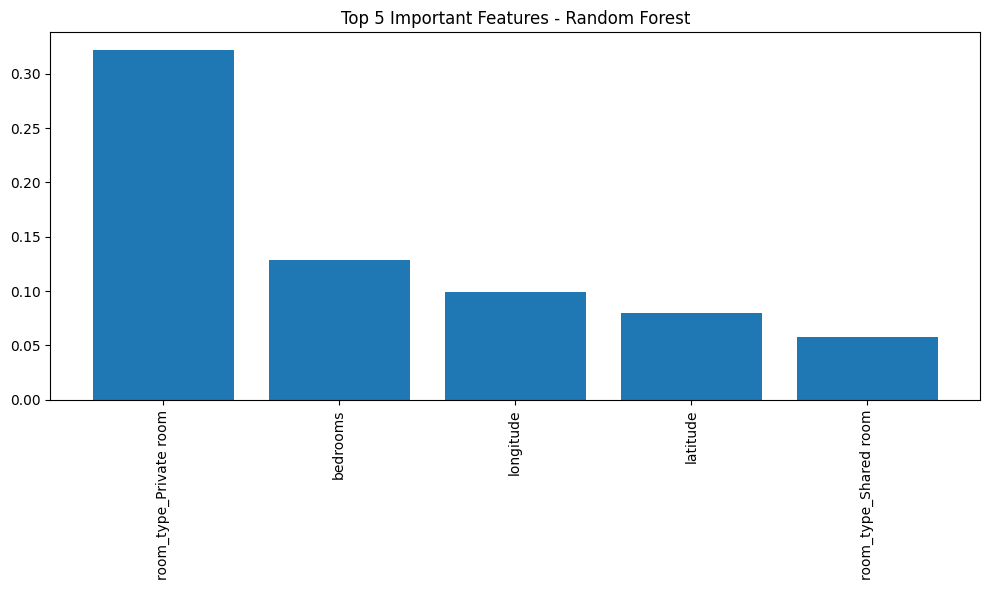

In [71]:
import matplotlib.pyplot as plt
import numpy as np

#Get feature importances for the RF model
feature_importances = best_model_rf.feature_importances_

#Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

#Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Top 5 Important Features - Random Forest")
plt.bar(range(5), feature_importances[indices][:5], align="center")
plt.xticks(range(5), X_train.columns[indices][:5], rotation=90)
plt.tight_layout()
plt.show()

From the above graph, we may deduce that according to the results of the Random Forest Model:
- Having a private room in homestays is by far the most important feature in determining the log price of a homestay.
- This is followed by the number of bedrooms. The more number of bedrooms, naturally the higher the log price.
- The location of the homestay as determined by it's latitude and longitude is the third most important factor in determining the log price of the homestay.

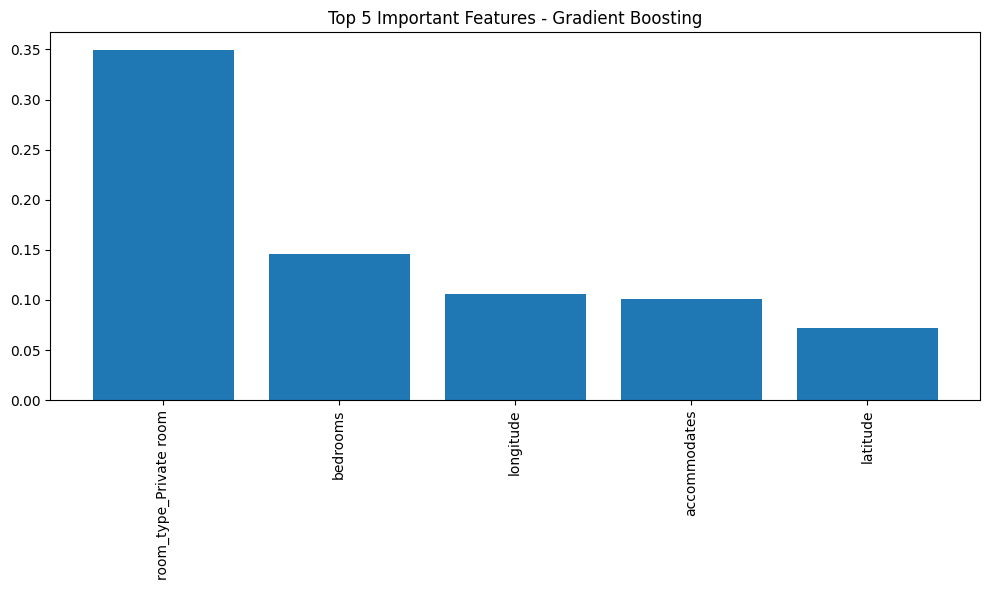

In [72]:
#Get feature importances for the RF model
feature_importances = best_model_gb.feature_importances_

#Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

#Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Top 5 Important Features - Gradient Boosting")
plt.bar(range(5), feature_importances[indices][:5], align="center")
plt.xticks(range(5), X_train.columns[indices][:5], rotation=90)
plt.tight_layout()
plt.show()

As seen in the graph above, the Gradient Boosting Model also has similar important features with the private room being the most important. In this case, the number of people the homestay can accomodate also seems to be one of the most important determining factors on the log price of the homestay.

**NOTE:** We can also use SHAP(SHapley Additive exPlanations) in order to explore the feature importance and gain model insights. However, it kept timing out my google colab session whenever I tried to use the shap library and hence I have excluded this section from the project.

# Predictive Performance Assessment

This final section deals with assessing the predictive performance of our best performing model which is the Random Forest Optimized model called `best_model_rf`.

In order to do this, let us measure the Root Mean Square Error (RMSE) and R-squared value of the model.

In [73]:
from sklearn.metrics import mean_squared_error, r2_score

#Make predictions on the test set
y_pred_rf = best_model_rf.predict(X_test)

#Calculate evaluation metrics
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)  # Root Mean Squared Error (RMSE)
r2_rf = r2_score(y_test, y_pred_rf)  # R-squared

# Print evaluation metrics
print("Root Mean Squared Error (RMSE):", rmse_rf)
print("R-squared:", r2_rf)

Root Mean Squared Error (RMSE): 0.33936625908372753
R-squared: 0.7400363119609085


- RMSE measures the average magnitude of the errors between predicted values and actual values. The closer the RMSE value is to 0, the better the performance of the model. In this case, the RMSE value is approximately 0.339. This means that, on average, the model's predictions are off by about 0.339 units of the log price. In this case, we have the RMSE value quite close to 0 and hence we can say that the model's predictions are, on average, quite close to the actual values of log_price.
- R-squared represents the proportion of the variance in the log price that is explained by the model. It ranges from 0 to 1, where 1 indicates a perfect fit and 0 denotes the worst fit. In this case, the R-squared value is approx. 0.74, which means that approximately 74% of the variance in the log_price can be explained by the model, thereby suggesting that it has good predictive power.

Let us now calculate the residuals and visualise them to check for any biases or misfits.

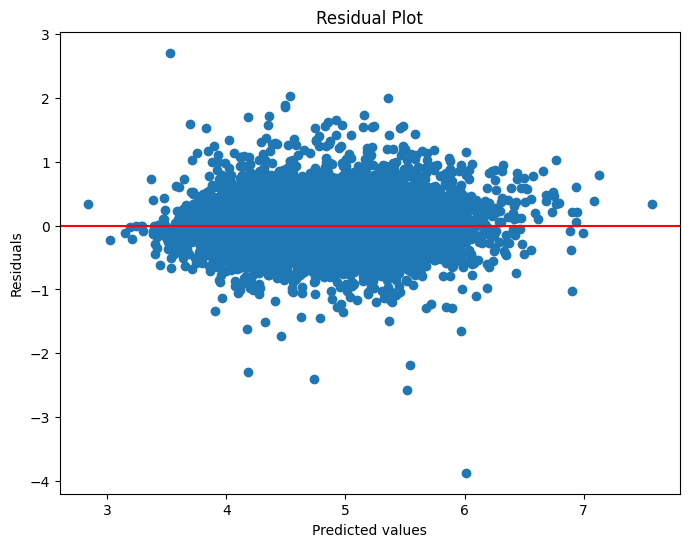

In [74]:
# Calculate residuals
residuals = y_test - y_pred_rf

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

Evidently, the scatter plot above does not give us much information about the balance of the model. Let us try a histogram of residuals instead.

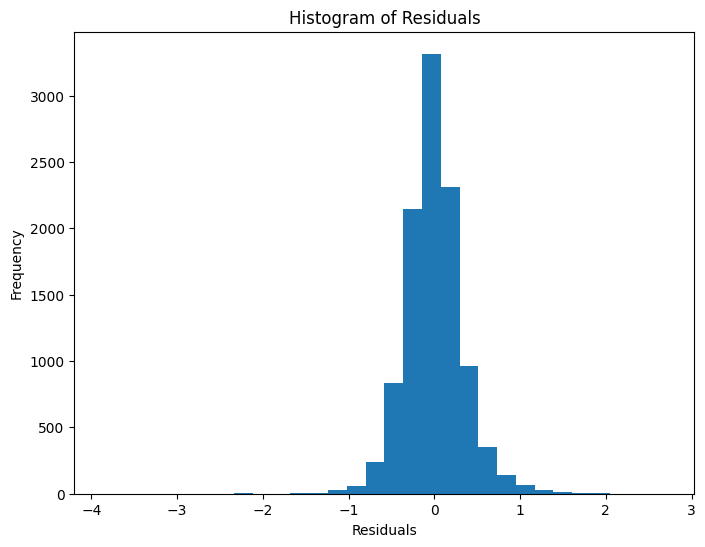

In [75]:
# Plot histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

Plotting a histogram of the residuals such as the one above allows us to examine their distribution. A normal distribution of residuals centered around zero indicates that the model's predictions are unbiased and have constant variance. These models are well balanced. However, if the histogram shows skewness or significant deviations from normality, it suggests that the model may have biases or inaccuracies.

From the histogram above, it is evident that we have an extremely good **normal distribution**, thereby confirming that our model is very well balanced and has very negligible bias. It is therefore an extremely good fit.

**Conclusion**

Through this project, we have successfully conducted a comprehensive analysis on a large homestays dataset consisting of 70,000+ columns. We have done extensive data cleaning, feature engineering and exploratory data analysis to become one with our data and get an idea of how each of the feature variables affect our target variable.

We have then conducted a geospatial analysis to get real-time visual interpretation of our data and conducted a sentiment analysis using the text blob NLP library. This helped us quantify qualitative data such as homestay reviews, which we later used in our model.

We also did a useful analysis on the amenities and dealt with categorical data in innovative ways that best suited our use case. We also made important decisions of deciding which columns to not include in the final model training.

We then conducted a series of experiments, optimized and validated them to arrive at our best performing model which was the Random Forest Optimized model. We reinforced this understanding by assessing it's predictive performance and visualising it.

The main takeaways from this project would be the power of visualising your data and experimenting with small but incremental changes in order to finally reach the best performing model for our use case.

In [76]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 libapache-pom-java libcommons-logging-java
  libcommons-parent-java libfontbox-java libfontenc1 libgs9 libgs9-common
  libidn12 libijs-0.35 libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1
  libruby3.0 libsynctex2 libteckit0 libtexlua53 libtexluajit2 libwoff1
  libzzip-0-13 lmodern poppler-data preview-latex-style rake ruby
  ruby-net-telnet ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0
  rubygems-integration t1utils teckit tex-common tex-gyre texlive-base
  texlive-binaries texlive-latex-base texlive-latex-extra
  texlive-latex-recommended texlive-pictures tipa xfonts-encodings
  xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf libavalon-framework-java
  libcommons-logging-java-doc libexcalibu

In [77]:
!jupyter nbconvert --to pdf /content/Home_Data_Price_Prediction.ipynb

[NbConvertApp] Converting notebook /content/Home_Data_Price_Prediction.ipynb to pdf
[NbConvertApp] Support files will be in Home_Data_Price_Prediction_files/
[NbConvertApp] Making directory ./Home_Data_Price_Prediction_files
[NbConvertApp] Making directory ./Home_Data_Price_Prediction_files
[NbConvertApp] Making directory ./Home_Data_Price_Prediction_files
[NbConvertApp] Making directory ./Home_Data_Price_Prediction_files
[NbConvertApp] Making directory ./Home_Data_Price_Prediction_files
[NbConvertApp] Making directory ./Home_Data_Price_Prediction_files
[NbConvertApp] Making directory ./Home_Data_Price_Prediction_files
[NbConvertApp] Making directory ./Home_Data_Price_Prediction_files
[NbConvertApp] Making directory ./Home_Data_Price_Prediction_files
[NbConvertApp] Writing 172261 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNI